In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
type(train_images)

numpy.ndarray

In [4]:
print(train_images[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

In [5]:
train_labels[1]

0

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

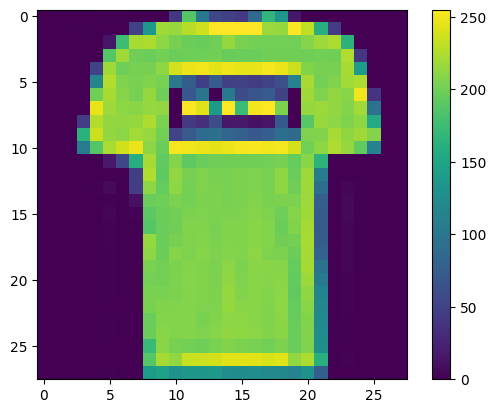

In [12]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [14]:
print(train_images[1])

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078431 0.7372549
  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353
  0.52156863 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215686 0.53333333 0.85882353 0.84705882 0.89411765
  0.9254902  1.         1.         1.         1.         0.85098039
  0.84313725 0.99607843 0.90588235 0.62745098 0.17647059 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.69019608 0.87058824 0.87843137 0.83137255 0.79607843 0.77647059
  0.76862745 0.78431373 0.84313725 0.8        0.79215686 0.78823529
  0.78823529 0.78823529 0.81960784 0.85490196 0.87843137 0.64313725
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7372549
 

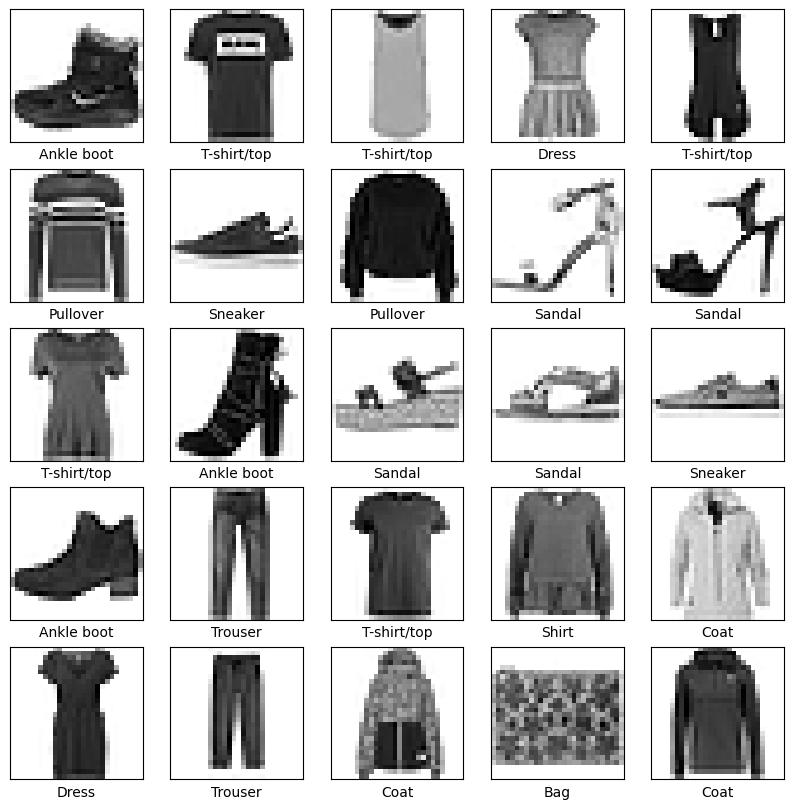

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4952 - accuracy: 0.8269
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3736 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3354 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3113 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2933 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2801 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2681 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2560 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2460 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2

In [20]:
modelbase=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [21]:
modelbase[0]

array([ -7.7110558, -13.351243 , -11.29937  , -11.049795 , -10.765938 ,
        -3.7813928,  -7.6908727,   2.8497157, -11.02424  ,   6.9950614],
      dtype=float32)

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3498 - accuracy: 0.8767 - 597ms/epoch - 2ms/step

Test accuracy: 0.8766999840736389


In [23]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [24]:
probability_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 10)                101770    
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [26]:
predictions[0]

array([4.0399922e-07, 1.4350887e-09, 1.1168518e-08, 1.4334562e-08,
       1.9039790e-08, 2.0559464e-05, 4.1223620e-07, 1.5590697e-02,
       1.4705627e-08, 9.8438793e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

In [29]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

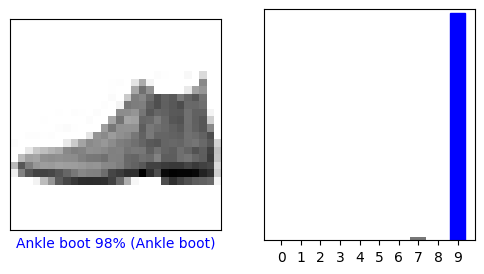

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

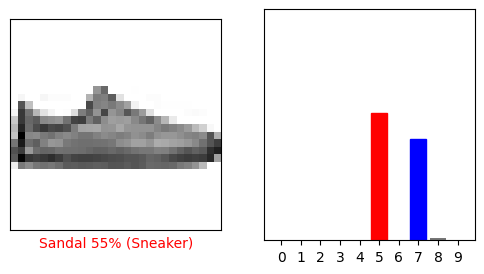

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

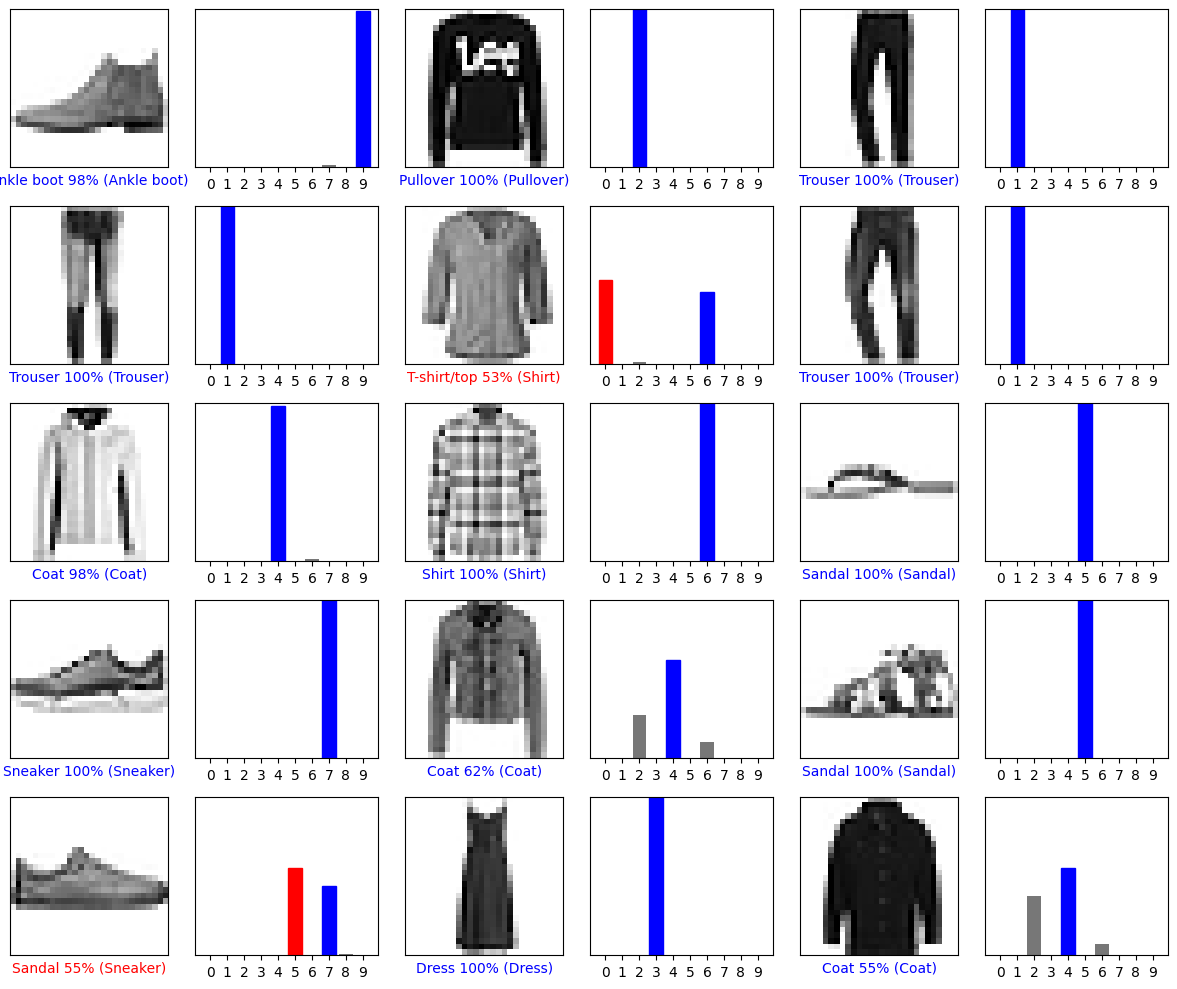

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label != true_label:
    color = 'red'
  else:
    color = 'blue'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [43]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    predicted_label = np.argmax(predictions_array)
    if predicted_label != true_label:  # Display only incorrect predictions
        plt.imshow(img, cmap=plt.cm.binary)
        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                              100*np.max(predictions_array),
                                              class_names[true_label]),
                   color='red')

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    if predicted_label != true_label:  # Display only incorrect predictions
        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('blue')

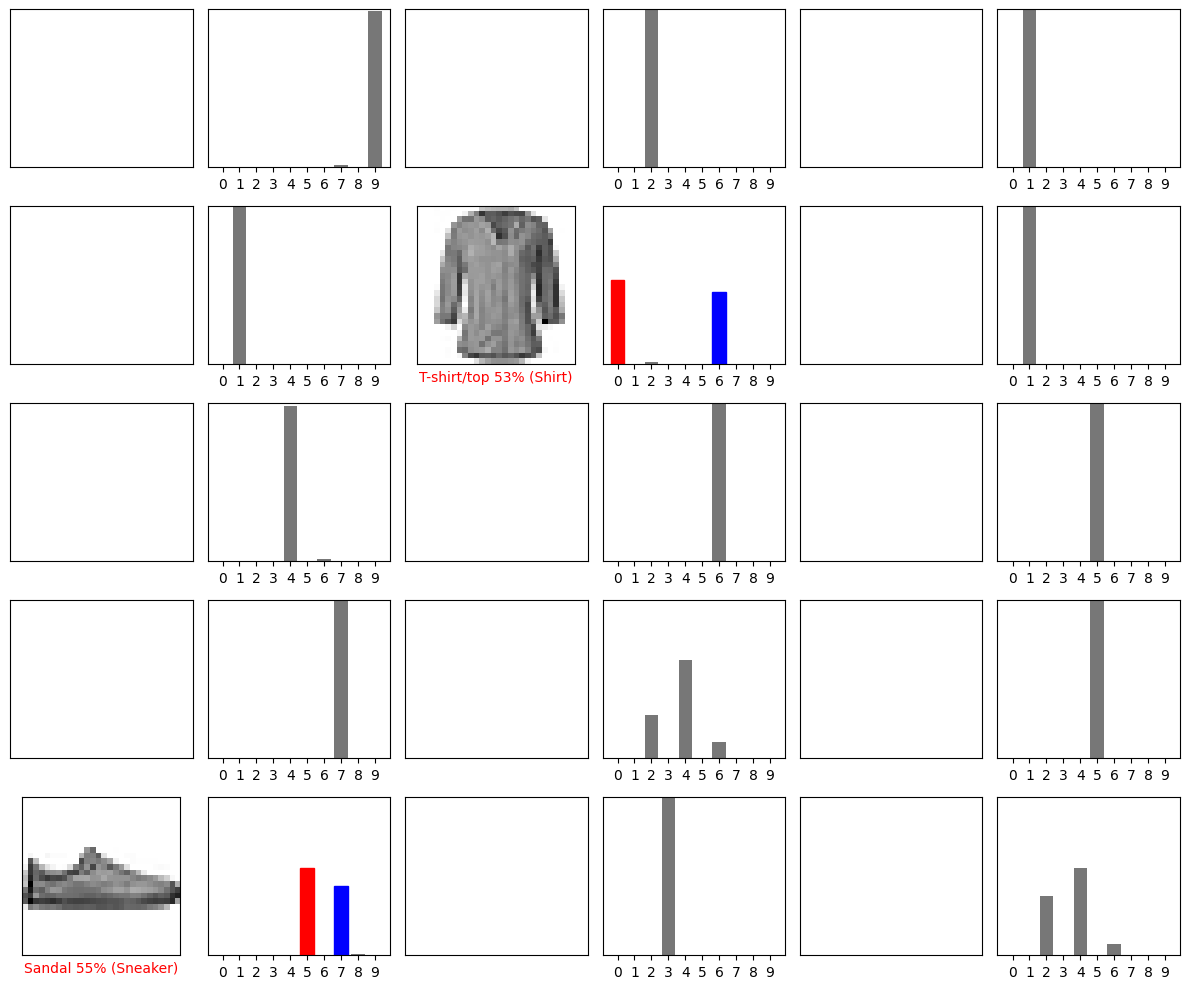

In [44]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

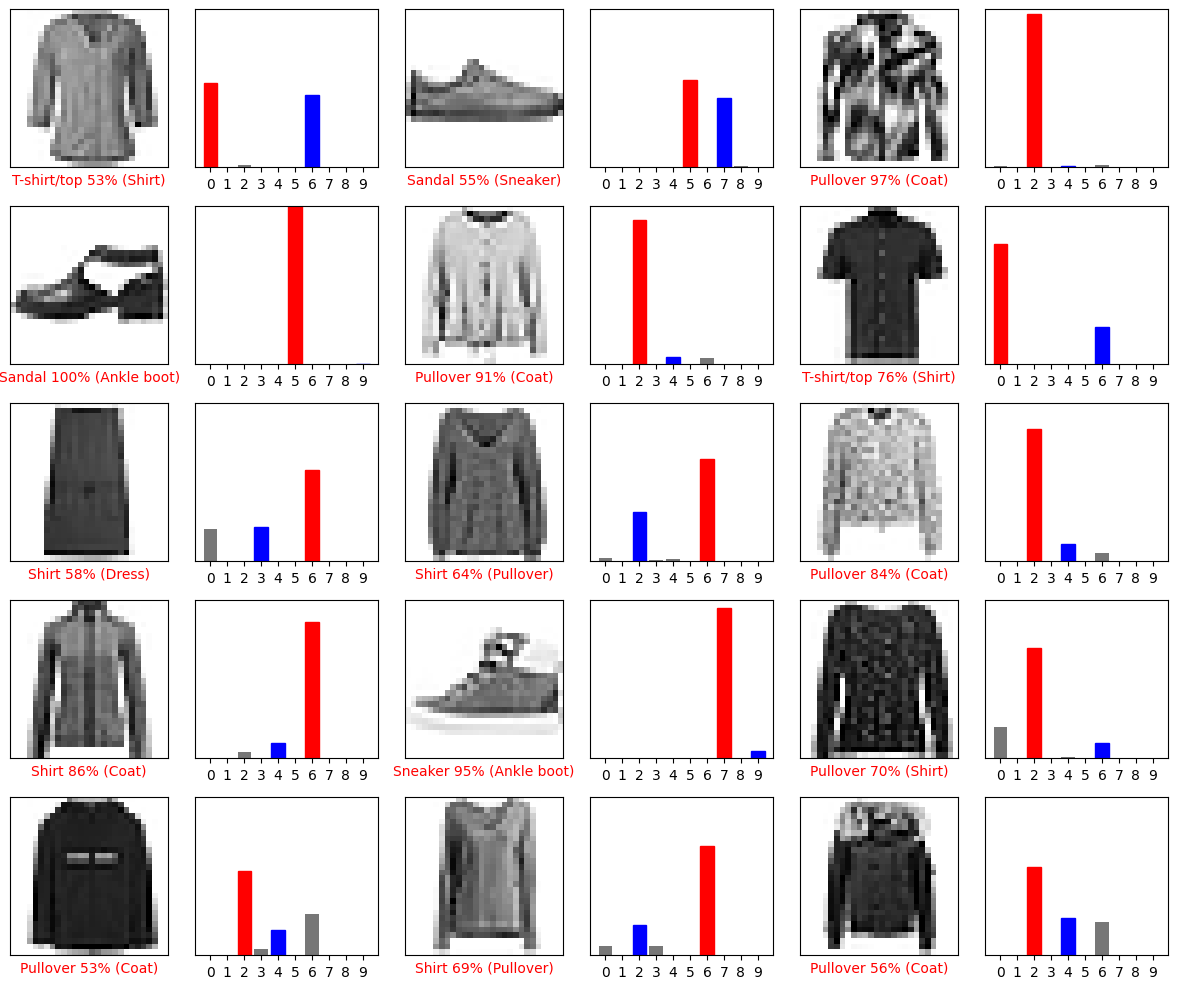

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    predicted_label = np.argmax(predictions_array)
    if predicted_label != true_label:  # Display only incorrect predictions
        plt.imshow(img, cmap=plt.cm.binary)
        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                              100*np.max(predictions_array),
                                              class_names[true_label]),
                   color='red')

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    if predicted_label != true_label:  # Display only incorrect predictions
        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
count = 0
for i in range(len(predictions)):
    if count >= num_images:
        break
    if np.argmax(predictions[i]) != test_labels[i]:
        plt.subplot(num_rows, 2*num_cols, 2*count+1)
        plot_image(i, predictions[i], test_labels, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*count+2)
        plot_value_array(i, predictions[i], test_labels)
        count += 1
plt.tight_layout()
plt.show()

In [49]:
import cv2
from google.colab.patches import cv2_imshow

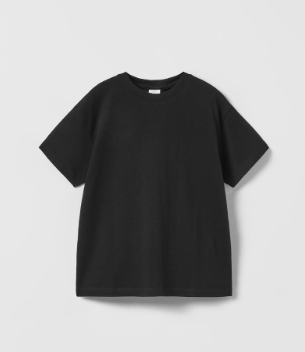

-1

In [53]:
pic='/content/shirtpic.png'
image = cv2.imread(pic)
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
predictions = probability_model.predict(test_images)
predictions[0]
np.argmax(predictions[0])

In [56]:
from PIL import Image

In [82]:
from PIL import Image
import numpy as np

def image_to_grayscale_array(image_path, target_shape=(28, 28)):
    # Open the image
    img = Image.open(image_path)

    # Convert the image to grayscale
    gray_img = img.convert('L')

    # Resize the image to the target shape
    resized_img = gray_img.resize(target_shape, Image.ANTIALIAS)

    # Convert the resized image to a NumPy array
    array_img = np.array(resized_img)

    return array_img

# Example usage
image_path = '/content/shirtpic.png'
target_shape = (28, 28)
result_array = image_to_grayscale_array(image_path, target_shape)

# Print the resulting NumPy array
print(result_array)

[[232 232 232 232 232 231 231 231 231 231 231 231 231 231 231 231 231 231
  231 231 231 231 230 230 230 229 229 229]
 [232 232 232 232 232 232 231 231 231 231 231 231 231 231 231 231 231 231
  231 231 231 231 231 230 230 230 229 229]
 [233 232 232 232 232 232 231 231 231 231 231 231 231 231 231 231 231 231
  231 231 231 231 231 230 230 230 230 229]
 [233 232 232 232 232 232 232 232 231 231 230 229 231 231 231 231 229 230
  231 231 231 231 231 231 231 230 230 230]
 [232 232 232 232 232 232 232 232 231 228 233 240 232 228 229 231 238 237
  229 229 231 231 231 231 231 230 230 230]
 [233 232 232 232 232 232 232 230 235 247 223 192 230 243 241 240 198 204
  243 239 228 231 231 231 231 230 230 230]
 [232 232 232 232 232 232 229 240 222 129  60  33  64 108 120  78  38  43
  102 192 241 229 231 231 231 230 230 230]
 [232 232 232 232 232 228 243 203  62  19  34  38  26  44  66  23  38  37
   27  34 142 240 228 230 231 231 230 230]
 [232 232 232 232 228 244 188  48  22  43  40  38  40  38  36  4

<ipython-input-82-30b3ece1e5a4>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = gray_img.resize(target_shape, Image.ANTIALIAS)


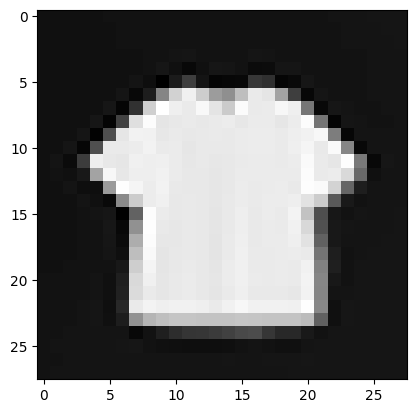

In [77]:
pro_images = result_array / 255.0
plt.imshow(pro_images, cmap=plt.cm.binary)

In [78]:
pro_images.shape

(28, 28)

In [79]:
train_images[0].shape

(28, 28)

In [80]:
# Assuming your result_array is a 28x28 grayscale image
flattened_array = pro_images.flatten()

# Assuming your model expects input of shape (784,)
reshaped_array = flattened_array.reshape(1, -1)  # Reshape to (1, 784) for a single image

# Now, you can use this reshaped_array for making predictions
predictions = probability_model.predict(reshaped_array)

1/1 [==============================] - 0s 22ms/step
